In [1]:
# Importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from pandas.errors import SettingWithCopyWarning

In [2]:
# I start with drawing the rating chart for the World #2, American Grandmaster Fabiano Caruana

fabi = pd.read_html('https://ratings.fide.com/profile/2020009/calculations')

In [3]:
# The 5th table holds the rating changes

fabi = fabi[5]

In [4]:
fabi.head()

,Period,RTNG,GMS,RAPID RTNG,RAPID GMS,BLITZ RTNG,BLITZ GMS
0,2024-Feb,2804,0,2729.0,0.0,2790.0,0.0
1,2024-Jan,2804,8,2729.0,37.0,2790.0,21.0
2,2023-Dec,2794,11,2762.0,9.0,2815.0,18.0
3,2023-Nov,2795,11,2765.0,0.0,2813.0,0.0
4,2023-Oct,2786,0,2765.0,0.0,2813.0,0.0


In [5]:
# Some data cleaning, also since candidates is classical format, I got rid of the rapid and blitz ratings.

fabi.columns

Index(['Period', 'RTNG', 'GMS', 'RAPID RTNG', 'RAPID GMS', 'BLITZ RTNG',
       'BLITZ GMS'],
      dtype='object')

In [6]:
fabi = fabi[['Period', 'RTNG']]

In [7]:
fabi.head()

,Period,RTNG
0,2024-Feb,2804
1,2024-Jan,2804
2,2023-Dec,2794
3,2023-Nov,2795
4,2023-Oct,2786


In [8]:
fabi['Period'].head()

0    2024-Feb
1    2024-Jan
2    2023-Dec
3    2023-Nov
4    2023-Oct
Name: Period, dtype: object

In [9]:
# The given time periods are by default "strings". I convert them to datetime object, just easier to work with.

from datetime import datetime

fabi['Period'] = pd.to_datetime(fabi['Period'],format='%Y-%b')

In [10]:
fabi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Period  188 non-null    datetime64[ns]
 1   RTNG    188 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.1 KB


In [11]:
# renaming the column
fabi.columns = ['Period','Rating']

In [12]:
# checking for missing data --> None found

(fabi['Period'].isnull()).sum()

0

In [13]:
(fabi['Rating'].isnull()).sum()

0

In [14]:
fabi.head()

,Period,Rating
0,2024-02-01,2804
1,2024-01-01,2804
2,2023-12-01,2794
3,2023-11-01,2795
4,2023-10-01,2786


<Axes: xlabel='Period', ylabel='Rating'>

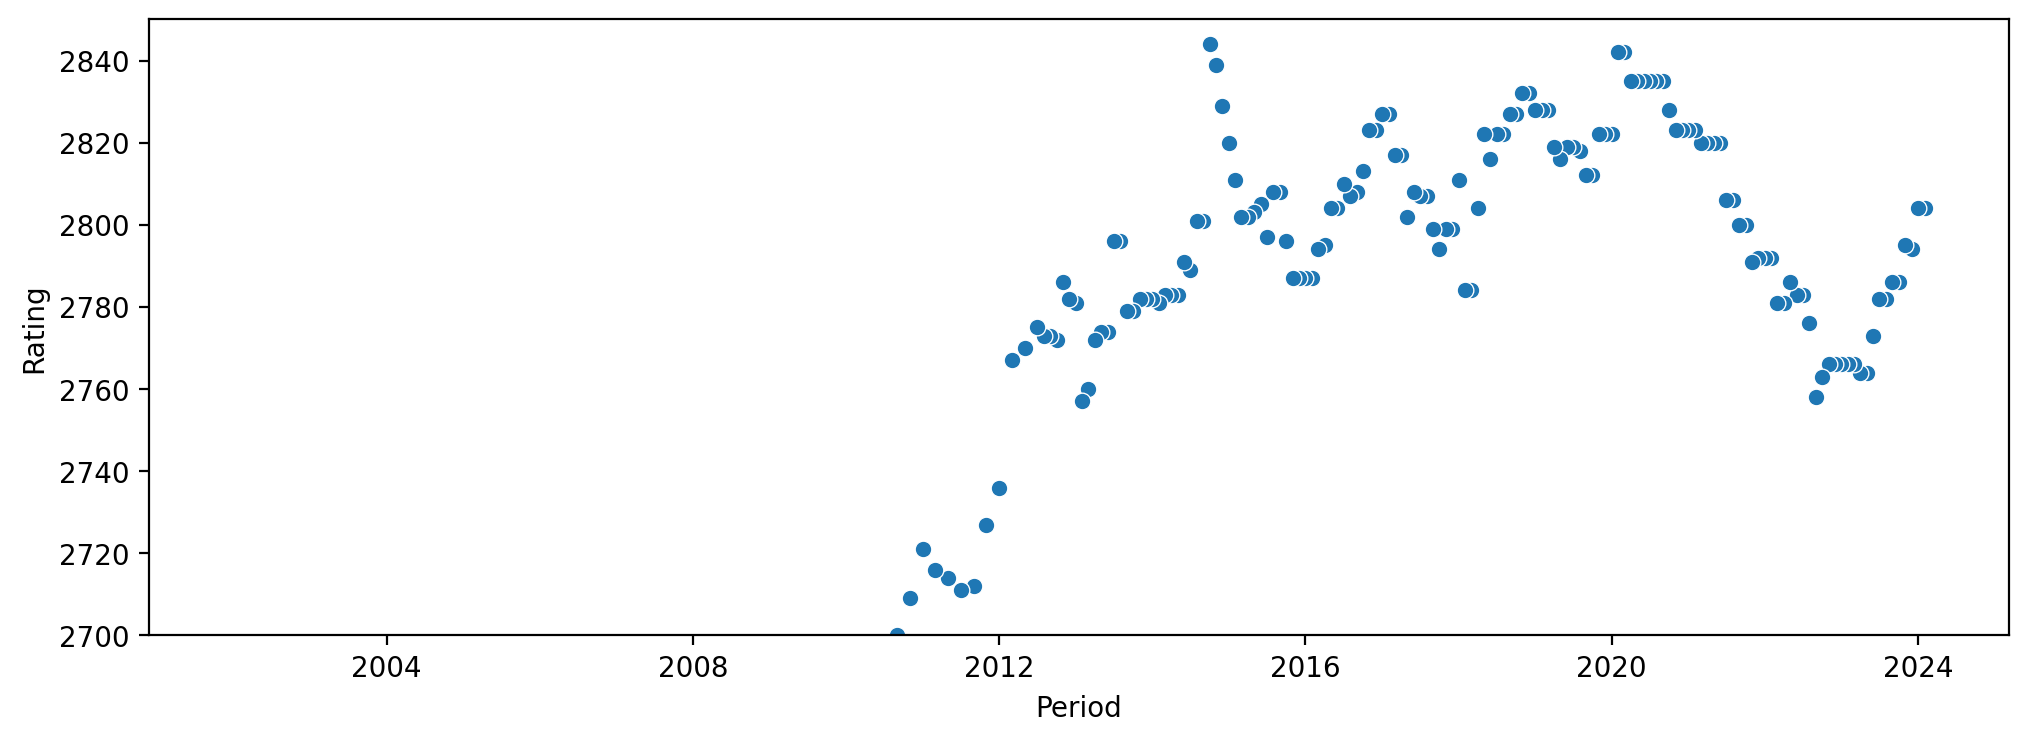

In [15]:
# Visualizing the rating chart over time

warnings.filterwarnings('ignore', category=SettingWithCopyWarning)


plt.figure(figsize=(12,4),dpi=200)
plt.ylim(2700,2850)
sns.scatterplot(data=fabi,x='Period',y='Rating')

<Axes: xlabel='Period', ylabel='Rating'>

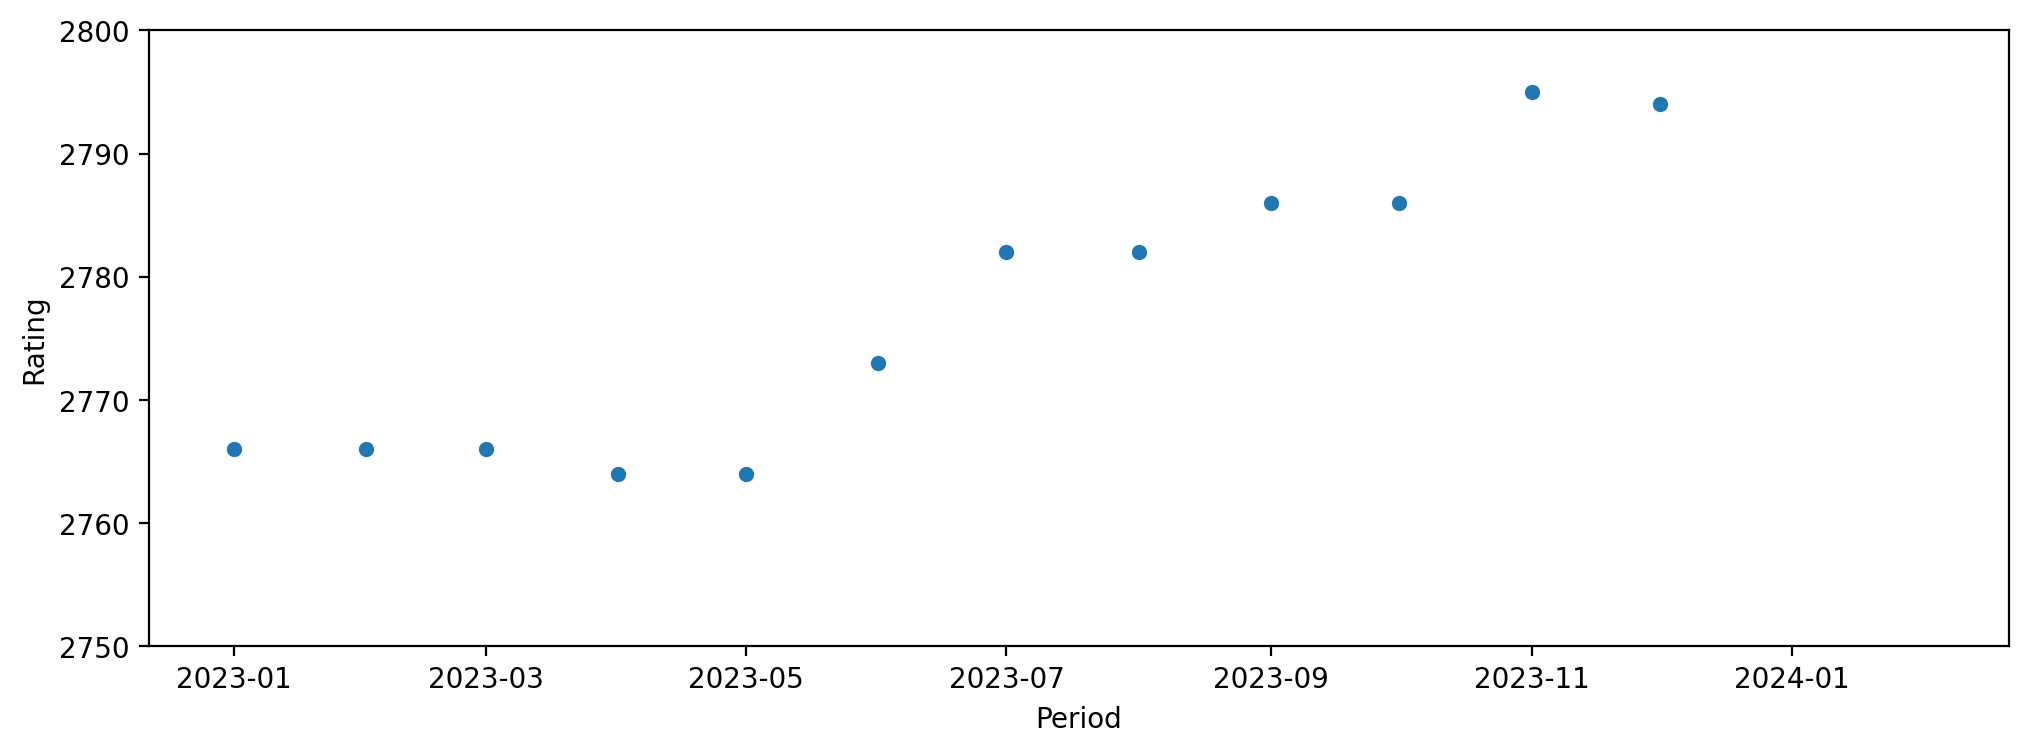

In [16]:
# Slicing the timeframe 2023 onwards.

plt.figure(figsize=(12,4),dpi=200)
plt.ylim(2750,2800)
sns.scatterplot(data=fabi[fabi['Period'] >= pd.to_datetime('2023-01-01 00:00:00')],x='Period',y='Rating')

### Fabiano has been playing excellent chess recently! Not surprising, he was qualifying to candidates in 5 different ways.

<img src="https://pbs.twimg.com/media/GBzwh_lXAAEsLoU?format=jpg&name=large" alt="Chess Candidates 2024" width="300">

### Repeating the same procedure for all the players

In [17]:
# Constructing the URL for all the players (set the FIDE-rating >= 2700)

webID = {
         'Fabiano':'2020009',
         'Hikaru':'2016192',
         'Alireza':'12573981',
         'Nepo':'4168119',
         'Vidit':'5029465',
         'Pragg':'25059530',
         'Gukesh':'46616543',
        }

playerSeries = pd.Series(webID)

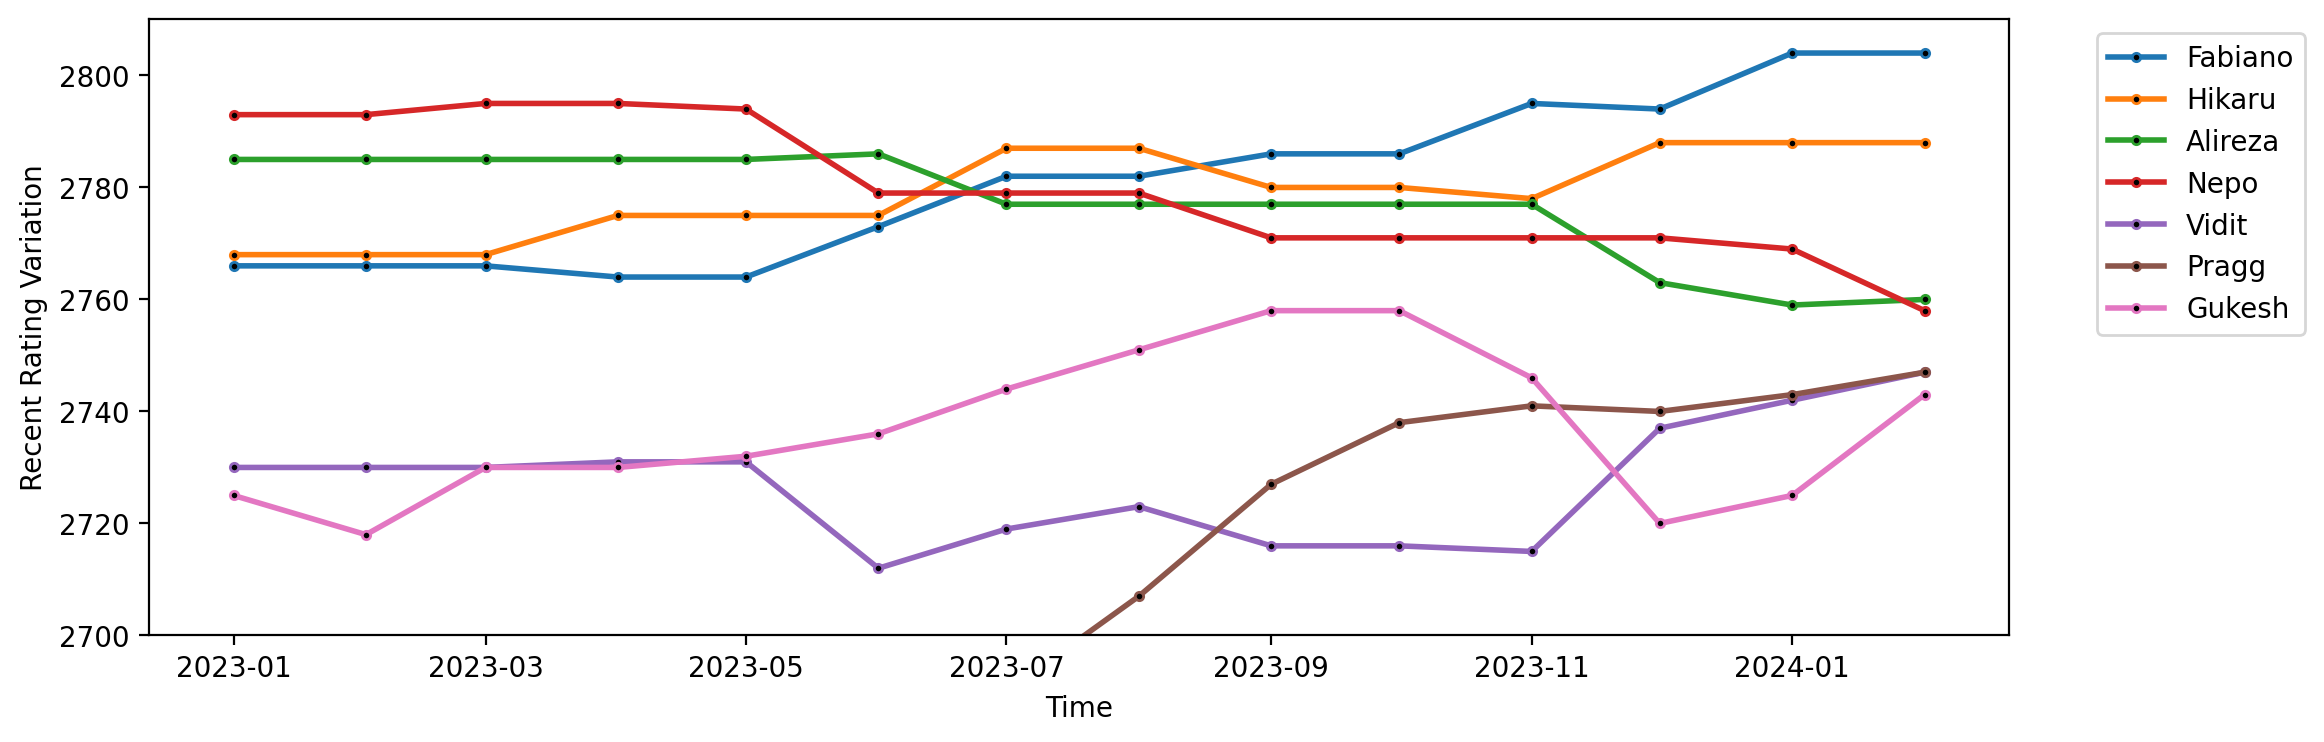

In [18]:
# Heavy brute force! Looping over the hand picked URL from the web, and plotted the ratings

plt.figure(figsize=(12,4),dpi=200)
plt.ylim(2700,2810)

for i in range(len(playerSeries)):
    
    playerURL = 'https://ratings.fide.com/profile/' + playerSeries[i] + '/calculations'
    
    df_list = pd.read_html(playerURL)
    
    # Required dataframe must be holding maximum records.
    sizeInside = []
    for j in range(len(df_list)):
        sizeInside.append(len(df_list[j]))
    
    df = df_list[np.array(sizeInside).argmax()]
    
    df = df[['Period', 'RTNG']]
    df['Period'] = pd.to_datetime(df['Period'],format='%Y-%b')
    df.columns = ['Period','Rating']

    # Extracting 2023 onwards
    data_2023 = df[df['Period'] >= pd.to_datetime('2023-01-01 00:00:00')]
    
    plt.plot(data_2023['Period'], data_2023['Rating'], label = playerSeries.index[i], 
             lw = 2, marker='o', markerfacecolor = 'black', ms = 3)
    
plt.ylabel('Recent Rating Variation')
plt.xlabel('Time')
plt.legend(bbox_to_anchor = (1.04,1))
plt.set_cmap('tab10')